Our data science problem is, Banks have to develop a machine learning model within 3 months to instantly predict credit card approval instead of waiting for a minimum of 7 days. We have a cleaned data set. Here we are going to explore the data, visualize the relationships between variables and find out patterns and emerging trends.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data
df_applicant= pd.read_csv(r'C:\Users\gibib\Desktop\Data Scientist\Springboard-Project-Capstone-2\Credit Card Data\Applicant_data_cleaned.csv')

In [3]:
df_applicant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  int64  
 3   FLAG_OWN_REALTY      36457 non-null  int64  
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  float64
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [4]:
#Dropping columns 'No.of X', 'No.of C', 'No.of 0', 'No.of 1', 'No.of 2',
#'No.of 3', 'No.of 4', 'No.of 5' as they are just used to derive the target variable 'STATUS'.
df_applicant = df_applicant.drop(columns=[
    'No.of X', 'No.of C', 'No.of 0', 'No.of 1', 'No.of 2',
    'No.of 3', 'No.of 4', 'No.of 5'
])

In [5]:
df_applicant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  int64  
 3   FLAG_OWN_REALTY      36457 non-null  int64  
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  float64
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [6]:
df_applicant.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1,1,0,0,2,BAD CUSTOMER
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1,1,0,0,2,BAD CUSTOMER
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134.0,1,0,0,0,2,GOOD CUSTOMER
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051.0,1,0,1,1,1,GOOD CUSTOMER
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051.0,1,0,1,1,1,GOOD CUSTOMER


<Axes: xlabel='STATUS', ylabel='count'>

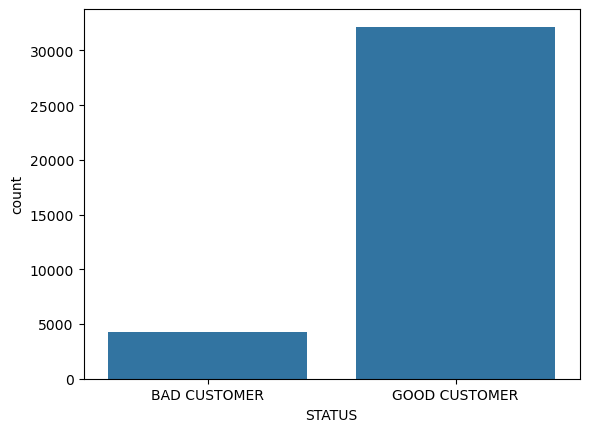

In [7]:
#Plotting the target variable
sns.countplot(x='STATUS', data= df_applicant)

We can see Good customers are more than 30,000 and Bad customers are less than 5000.

In [8]:
#To get the correct count of good and bad customers.
df_applicant["STATUS"].value_counts(dropna=False)

STATUS
GOOD CUSTOMER    32166
BAD CUSTOMER      4291
Name: count, dtype: int64

In [9]:
#Our target variable is STATUS. 
#To change 'STATUS', 'GOOD CUSTOMER' to 1, 'BAD CUSTOMER'to 0, so that it will be easy to do all calculations.
df_applicant['STATUS'] = df_applicant['STATUS'].map({'GOOD CUSTOMER': 1, 'BAD CUSTOMER': 0})

In [10]:
df_applicant.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1,1,0,0,2,0
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1,1,0,0,2,0
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134.0,1,0,0,0,2,1
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051.0,1,0,1,1,1,1
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051.0,1,0,1,1,1,1


In [11]:
#To change data type to int
df_applicant['STATUS'] = df_applicant['STATUS'].astype('int')

In [12]:
#To change data type to category
df_applicant['NAME_INCOME_TYPE']=df_applicant['NAME_INCOME_TYPE'].astype('category')

In [13]:
#To change data type to category
df_applicant['NAME_EDUCATION_TYPE']=df_applicant['NAME_EDUCATION_TYPE'].astype('category')

In [14]:
#To change data type to category
df_applicant['NAME_FAMILY_STATUS']=df_applicant['NAME_FAMILY_STATUS'].astype('category')

In [15]:
#To change data type to category
df_applicant['NAME_HOUSING_TYPE']=df_applicant['NAME_HOUSING_TYPE'].astype('category')

In [16]:
#To change data type to category
df_applicant['CODE_GENDER']=df_applicant['CODE_GENDER'].astype('category')

In [17]:
df_applicant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   36457 non-null  int64   
 1   CODE_GENDER          36457 non-null  category
 2   FLAG_OWN_CAR         36457 non-null  int64   
 3   FLAG_OWN_REALTY      36457 non-null  int64   
 4   CNT_CHILDREN         36457 non-null  int64   
 5   AMT_INCOME_TOTAL     36457 non-null  float64 
 6   NAME_INCOME_TYPE     36457 non-null  category
 7   NAME_EDUCATION_TYPE  36457 non-null  category
 8   NAME_FAMILY_STATUS   36457 non-null  category
 9   NAME_HOUSING_TYPE    36457 non-null  category
 10  DAYS_BIRTH           36457 non-null  int64   
 11  DAYS_EMPLOYED        36457 non-null  float64 
 12  FLAG_MOBIL           36457 non-null  int64   
 13  FLAG_WORK_PHONE      36457 non-null  int64   
 14  FLAG_PHONE           36457 non-null  int64   
 15  FLAG_EMAIL         

In [18]:
# Call the .corr() method on the dataset 
numeric_df_applicant=df_applicant.select_dtypes(include=['number']).drop(columns=['ID'])
numeric_df_applicant.corr()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
FLAG_OWN_CAR,1.000000,-0.015185,0.105839,0.215506,0.157144,0.065631,NaN,0.021644,-0.014019,0.021750,0.151814,0.010580
FLAG_OWN_REALTY,-0.015185,1.000000,-0.000575,0.032719,-0.129838,-0.005823,NaN,-0.207732,-0.066601,0.052194,-0.005723,0.027990
CNT_CHILDREN,0.105839,-0.000575,1.000000,0.033691,0.339357,0.058297,NaN,0.048091,-0.016291,0.015960,0.889114,-0.011525
AMT_INCOME_TOTAL,0.215506,0.032719,0.033691,1.000000,0.067908,-0.018421,NaN,-0.037746,0.017245,0.086681,0.023750,-0.024202
DAYS_BIRTH,0.157144,-0.129838,0.339357,0.067908,1.000000,0.259715,NaN,0.179054,-0.028659,0.105625,0.304020,-0.028943
DAYS_EMPLOYED,0.065631,-0.005823,0.058297,-0.018421,0.259715,1.000000,NaN,-0.010814,-0.044354,0.042123,0.042072,-0.004274
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,0.021644,-0.207732,0.048091,-0.037746,0.179054,-0.010814,NaN,1.000000,0.311644,-0.034838,0.064527,0.000149
FLAG_PHONE,-0.014019,-0.066601,-0.016291,0.017245,-0.028659,-0.044354,NaN,0.311644,1.000000,0.010455,-0.004221,0.006355
FLAG_EMAIL,0.021750,0.052194,0.015960,0.086681,0.105625,0.042123,NaN,-0.034838,0.010455,1.000000,0.014619,-0.019658


These shows the correlations.It will be more easy to understand the correlation between the variables, if it is represented visually.

In [19]:
df_applicant['FLAG_MOBIL']

0        1
1        1
2        1
3        1
4        1
        ..
36452    1
36453    1
36454    1
36455    1
36456    1
Name: FLAG_MOBIL, Length: 36457, dtype: int64

All values in this column are identical (likely all 1), so its variance = 0. So NaN appears in correlation because that feature has NO variation.

In [20]:
#Dropping column 'FLAG_MOBIL' as NaN appears in correlation because that feature has NO variation.
df_applicant= df_applicant.drop(['FLAG_MOBIL'], axis=1)

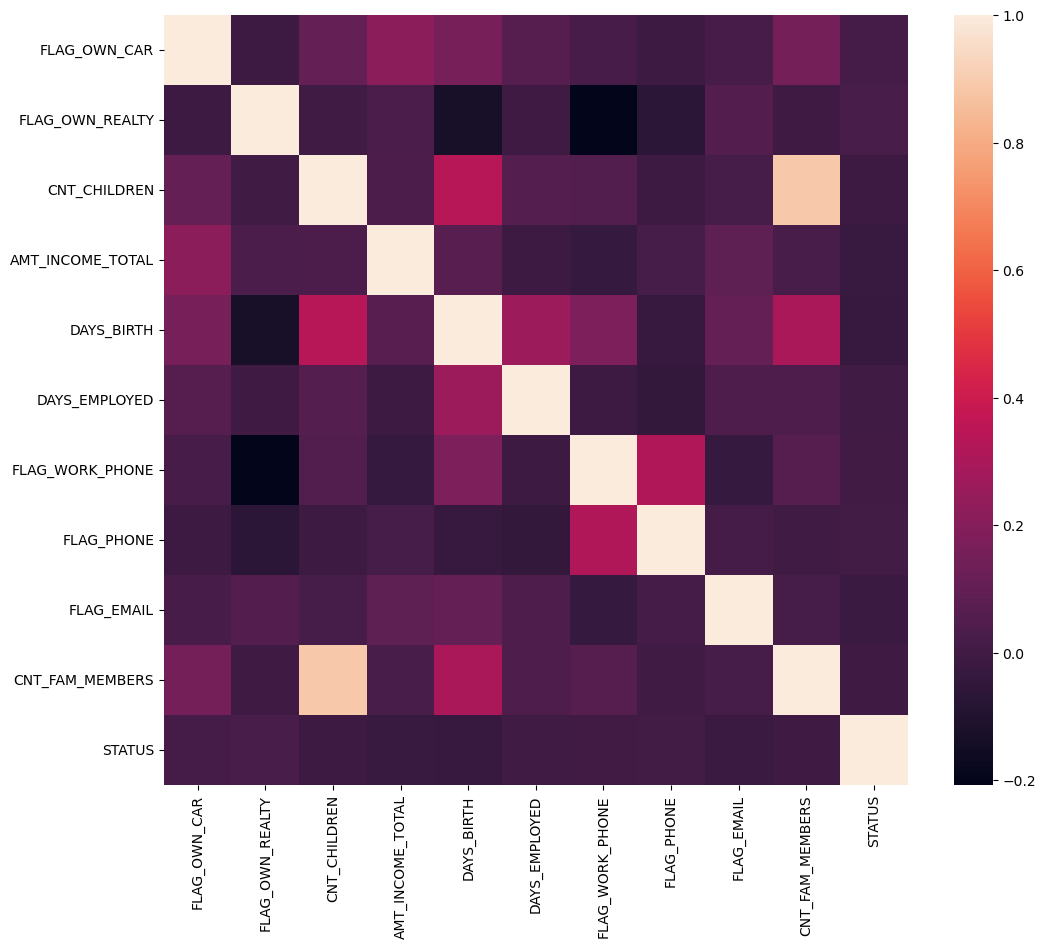

In [31]:
#To represent the correlation visually
numeric_df_applicant=df_applicant.select_dtypes(include=['number']).drop(columns=['ID'])
plt.subplots(figsize=(12,10))
sns.heatmap(numeric_df_applicant.corr());

Here most of the features are not very much related with others. 

In [22]:
#plotting box plots to find the relationship between STATUS column with other numeric columns.
def box_plots(columns, ncol=3, figsize=(16, 9)):
    cols = [c for c in columns if c != 'STATUS']
    nrow = int(np.ceil(len(cols) / ncol))

    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.3, hspace=0.6)

    for i, col in enumerate(cols):
        ax = axes.flatten()[i]
        sns.boxplot(x='STATUS', y=col, data=df_applicant, ax=ax)
        ax.set_title(f"STATUS vs {col}")

    for j in range(i + 1, nrow * ncol):
        axes.flatten()[j].set_visible(False)

    plt.show()


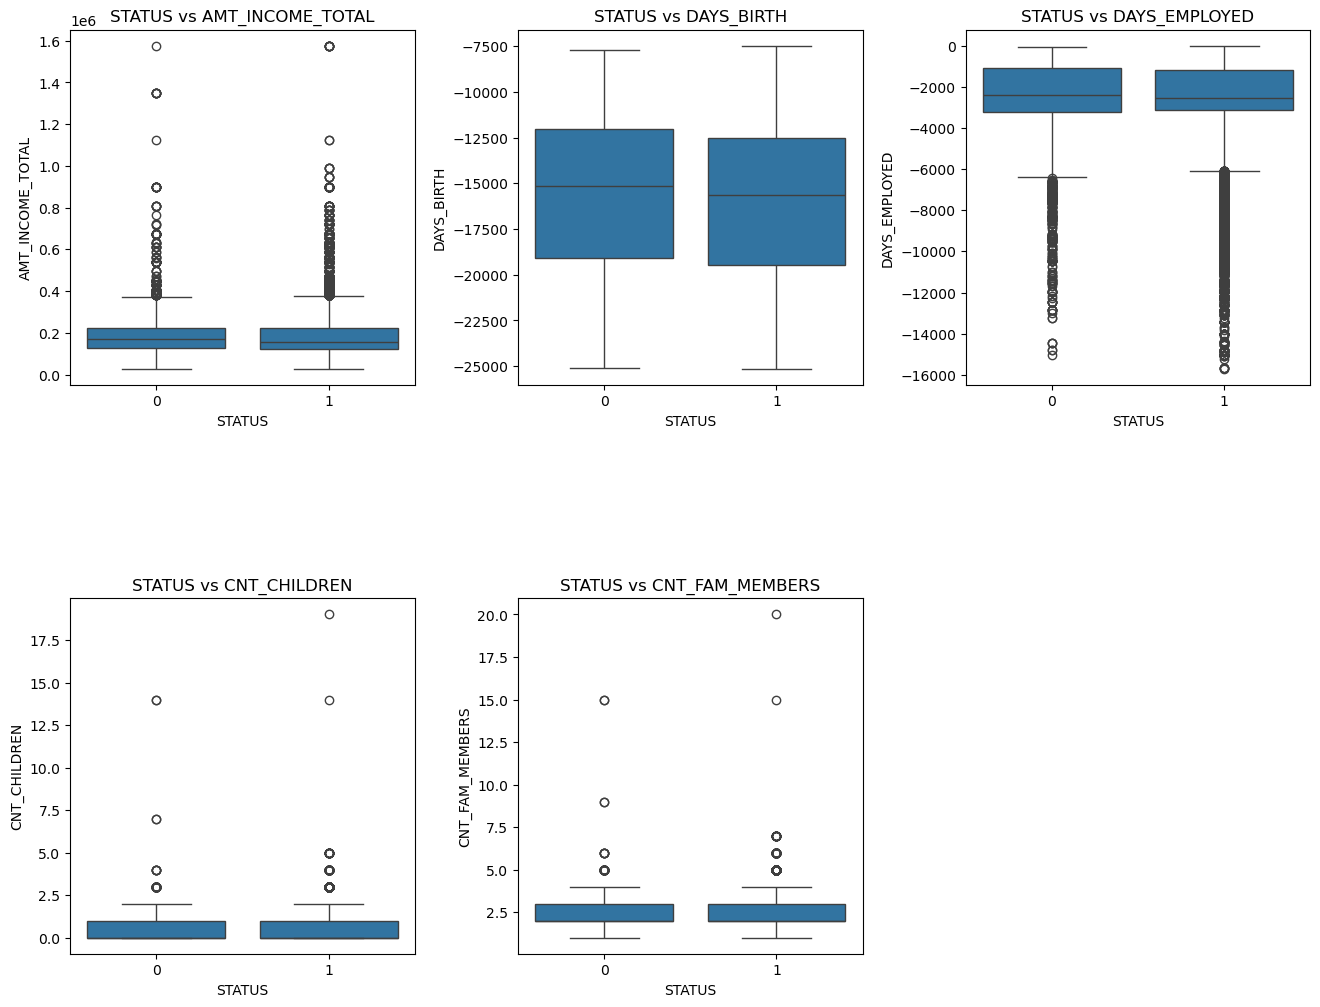

In [23]:
numeric_cols = [
    'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
    'CNT_CHILDREN', 'CNT_FAM_MEMBERS']

box_plots(numeric_cols, ncol=3, figsize=(16, 12))


The above plots shows the status of customer is not much affected by 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
'CNT_CHILDREN' and 'CNT_FAM_MEMBERS' columns. 

In [24]:
#plotting multiple_stacked_bars to find the relationship between STATUS column with other categorical columns(having 2 types of category).
def plot_multiple_stacked_bars(df, target_cat, cat_columns, ncol=2, figsize=(14, 10)):
    # Remove the target variable if it's inside the list
    cat_columns = [c for c in cat_columns if c != target_cat]

    nrow = int(np.ceil(len(cat_columns) / ncol))

    fig, axes = plt.subplots(nrow, ncol, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(cat_columns):
        # Compute proportion table
        ct_prop = pd.crosstab(df[target_cat], df[col], normalize='index') * 100

        # Stacked bar plot
        ct_prop.plot(kind='bar', stacked=True, ax=axes[i], colormap="Blues")

        axes[i].set_title(f"{target_cat} vs {col}")
        axes[i].set_ylabel("Percentage (%)")
        axes[i].set_xlabel(target_cat)
        axes[i].legend(title=col)

    # Hide unused axes
    for j in range(i + 1, nrow * ncol):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()


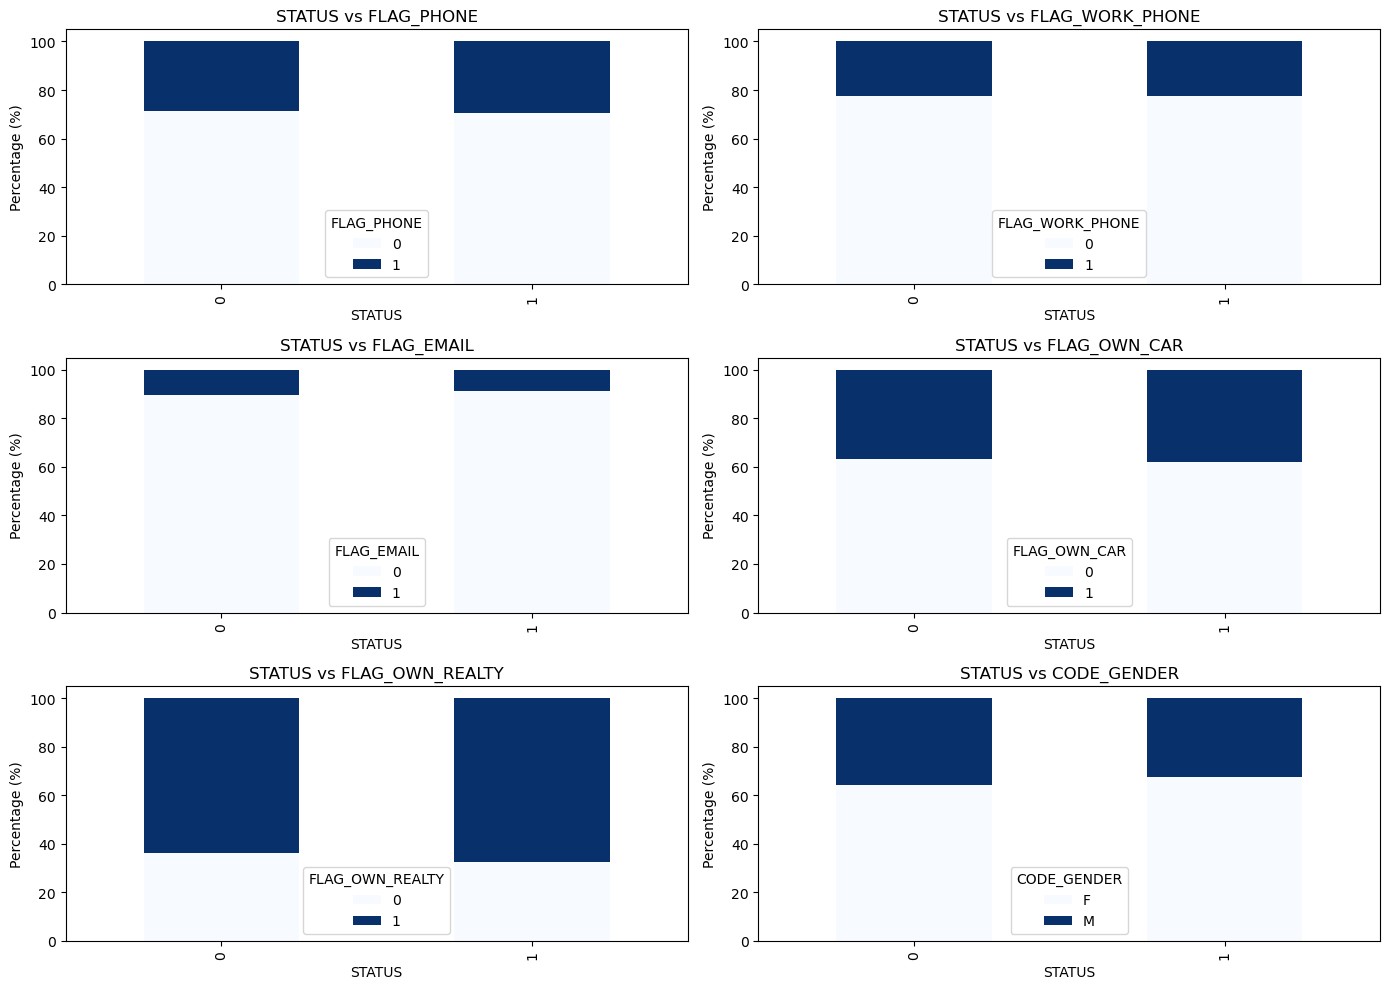

In [25]:
categorical_cols = [
    "FLAG_PHONE", "FLAG_WORK_PHONE", "FLAG_EMAIL",
    "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
    'CODE_GENDER']

plot_multiple_stacked_bars(df_applicant, target_cat="STATUS", cat_columns=categorical_cols)



Here the multiple_stacked_bars graphs show that the proportion for differen types of different categories is almost similar for both good and bad customers. So these columns do not shows influence in STATUS column.

In [26]:
#plotting categorical_proportion_heatmaps to find the relationship between STATUS column with other categorical columns(having more than 4 types of category).
def plot_categorical_proportion_heatmaps(df, target_cat, cat_columns, ncol=2, figsize=(16, 12)):
    """
    Plot proportional heatmaps for multiple categorical variables against a single target categorical variable.
    All categorical variables are assumed to have > 4 unique categories.
    """
    nrow = int(np.ceil(len(cat_columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize)
    axes = axes.flatten()
    
    for i, col in enumerate(cat_columns):
        # Create proportional crosstab
        ct_prop = pd.crosstab(df[col], df[target_cat], normalize='index') * 100
        
        # Plot heatmap
        sns.heatmap(ct_prop, annot=True, fmt=".1f", cmap="Blues", ax=axes[i])
        axes[i].set_title(f"{target_cat} vs {col}")
        axes[i].set_ylabel(col)
        axes[i].set_xlabel(target_cat)
    
    # Hide any unused axes
    for j in range(i+1, nrow*ncol):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()


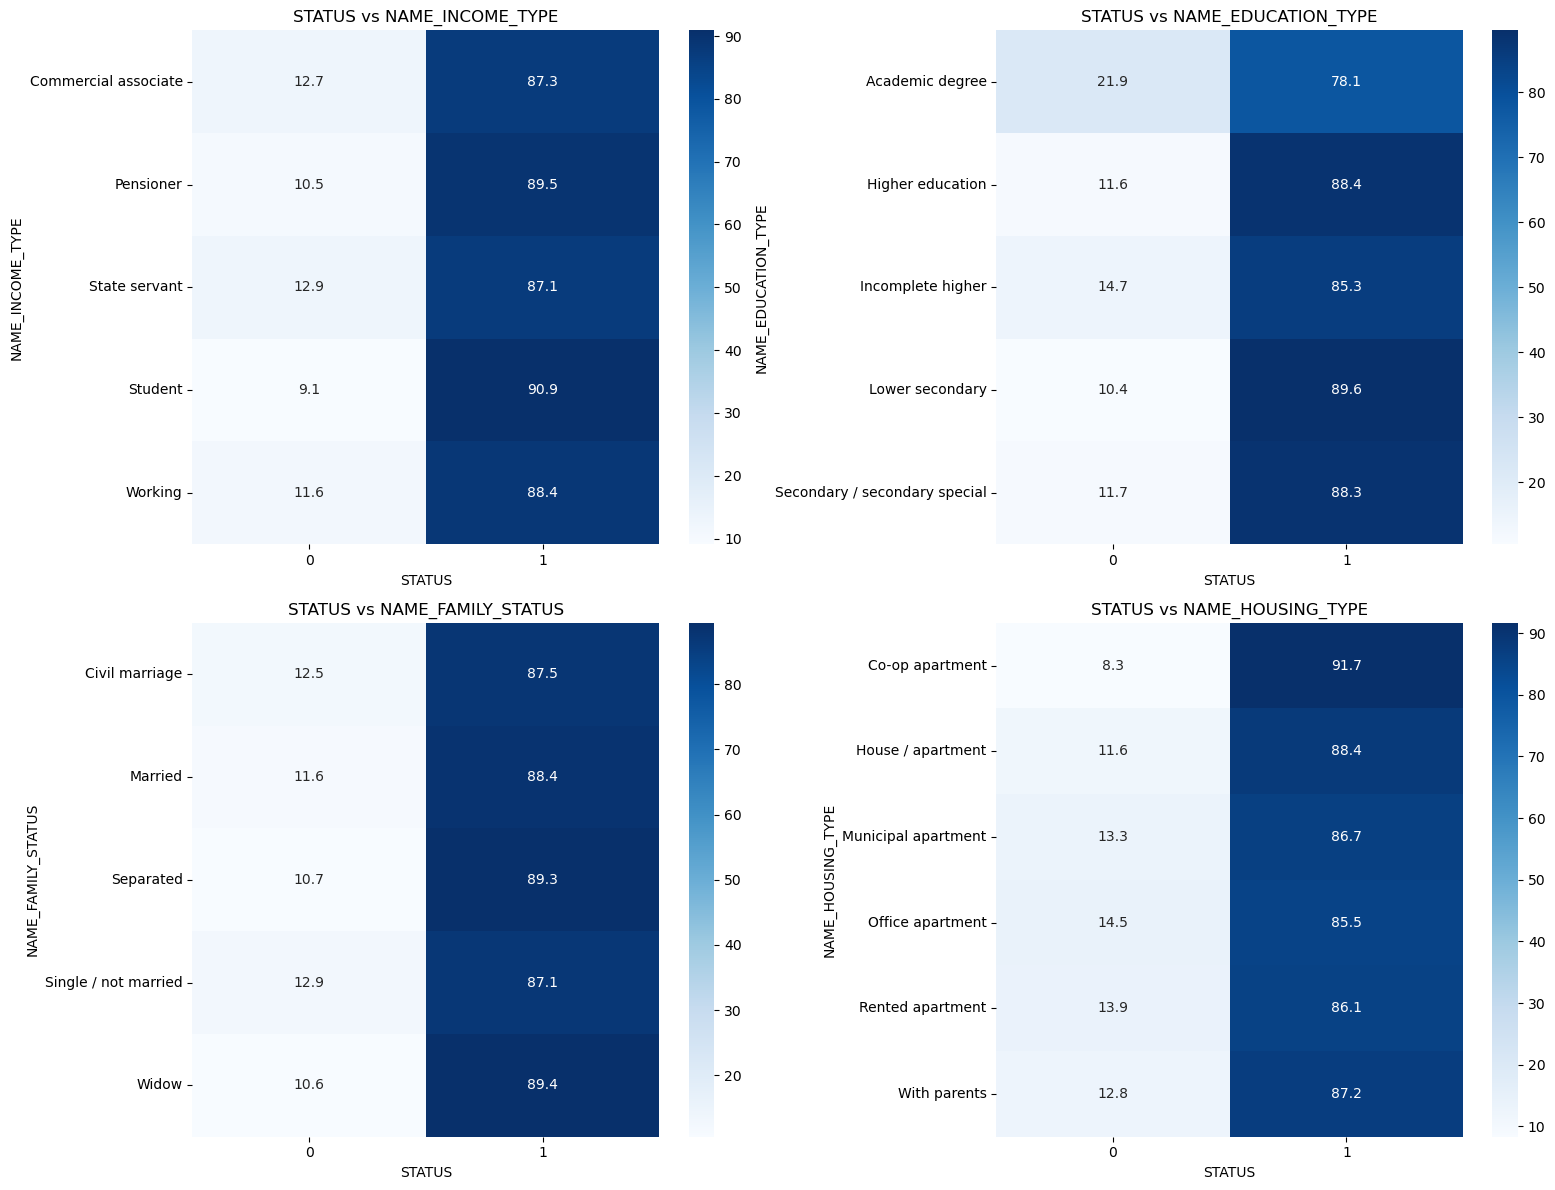

In [27]:
categorical_cols = [
    'NAME_INCOME_TYPE', 
    'NAME_EDUCATION_TYPE', 
    'NAME_FAMILY_STATUS', 
    'NAME_HOUSING_TYPE'
]


# Plot proportional heatmaps
plot_categorical_proportion_heatmaps(
    df_applicant,
    target_cat='STATUS',
    cat_columns=categorical_cols
)


These plots also shows that the proportion of different types of different category do not influence the STATUS column.

In [28]:
df_applicant.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1,0,0,2,0
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1,0,0,2,0
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134.0,0,0,0,2,1
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051.0,0,1,1,1,1
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051.0,0,1,1,1,1


In [29]:
df_applicant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   36457 non-null  int64   
 1   CODE_GENDER          36457 non-null  category
 2   FLAG_OWN_CAR         36457 non-null  int64   
 3   FLAG_OWN_REALTY      36457 non-null  int64   
 4   CNT_CHILDREN         36457 non-null  int64   
 5   AMT_INCOME_TOTAL     36457 non-null  float64 
 6   NAME_INCOME_TYPE     36457 non-null  category
 7   NAME_EDUCATION_TYPE  36457 non-null  category
 8   NAME_FAMILY_STATUS   36457 non-null  category
 9   NAME_HOUSING_TYPE    36457 non-null  category
 10  DAYS_BIRTH           36457 non-null  int64   
 11  DAYS_EMPLOYED        36457 non-null  float64 
 12  FLAG_WORK_PHONE      36457 non-null  int64   
 13  FLAG_PHONE           36457 non-null  int64   
 14  FLAG_EMAIL           36457 non-null  int64   
 15  CNT_FAM_MEMBERS    

In [30]:
# save the data to a new csv file
df_applicant.to_csv(
    r'C:\Users\gibib\Desktop\Data Scientist\Springboard-Project-Capstone-2\Credit Card Data\Applicant_data_explored.csv',
    index=False
)

SUMMARY:
At this Exploratory Data Analysis step of the project, I explored the data, visualize the relationships between variables and find out patterns and emerging trends. Our target variable was STATUS. We can see Good customers are more than 30,000 (32166) and Bad customers are less than 5000(4291) by plotting the histogram. The 'STATUS' column was updated, 'GOOD CUSTOMER' to 1, 'BAD CUSTOMER' to 0, so that it will be easy to do all calculations. Also the datatype was changed to int. Some other columns were coverted to type category for easiness in plotting.  We then started to check the correlations between the variables. We use .corr() method, plotted a heatmap, boxplots, multiple_stacked_bars and categorical_proportion_heatmaps. When used .corr() method and heatmap most of the features were found not very much related with others. Plotted box plots to find the relationship between STATUS column with other numeric columns. It showed the status of customer is not much affected by 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_CHILDREN' and 'CNT_FAM_MEMBERS' columns. Plotted multiple_stacked_bars to find the relationship between STATUS column with other categorical columns(having 2 types of category). It showed that the proportion for differen types of different categories is almost similar for both good and bad customers. So these columns do not shows influence in STATUS column. We then plotted categorical_proportion_heatmaps to find the relationship between STATUS column with other categorical columns(having more than 4 types of category). These plots also shows that the proportion of different types of different category do not influence the STATUS column. So we were not able to find any relationship between STATUS column with other features.